<a href="https://colab.research.google.com/github/Nabarundutta/Amazon_ml/blob/master/NLP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('processed_imdb.csv')[0:100]
df.head()

,review,sentiment,tokens,stemmed_tokens
0,one reviewers mentioned watching 1 oz e...,1,"['one', ' ', 'reviewers', ' ', 'mentioned', ...","['one', ' ', 'review', ' ', 'mention', ' ',..."
1,wonderful little production filming techniqu...,1,"[' ', 'wonderful', 'little', 'production', ' '...","[' ', 'wonder', 'littl', 'product', ' ', 'film..."
2,thought wonderful way spend time hot s...,1,"[' ', 'thought', ' ', 'wonderful', 'way', ' ...","[' ', 'thought', ' ', 'wonder', 'way', ' ', ..."
3,basically theres family little boy jake thi...,0,"['basically', 'there', 's', ' ', 'family', ' ...","['basic', 'there', 's', ' ', 'famili', ' ', '..."
4,petter matteis love time money visually s...,1,"['petter', 'matteis', 'love', ' ', 'time', ' ...","['petter', 'mattei', 'love', ' ', 'time', ' '..."


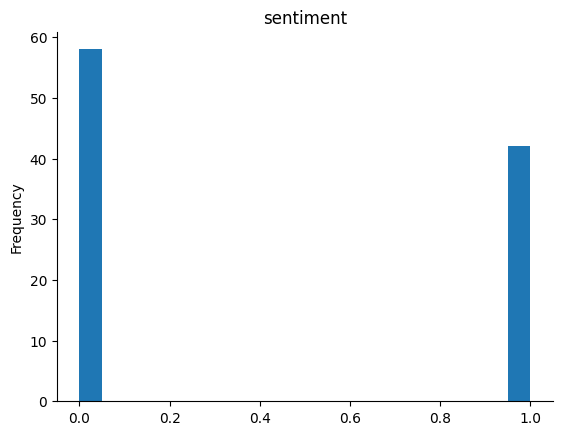

In [7]:
# @title sentiment

from matplotlib import pyplot as plt
df['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df.shape

(100, 4)

In [5]:
df.drop(columns=['review','tokens'],axis=1,inplace=True)

In [6]:
df.head()

,sentiment,stemmed_tokens
0,1,"['one', ' ', 'review', ' ', 'mention', ' ',..."
1,1,"[' ', 'wonder', 'littl', 'product', ' ', 'film..."
2,1,"[' ', 'thought', ' ', 'wonder', 'way', ' ', ..."
3,0,"['basic', 'there', 's', ' ', 'famili', ' ', '..."
4,1,"['petter', 'mattei', 'love', ' ', 'time', ' '..."


In [10]:
from sklearn.feature_extraction.text import CountVectorizer # Make sure to import from sklearn.feature_extraction.text
cv = CountVectorizer()

In [11]:
bow = cv.fit_transform(df['stemmed_tokens'])

In [15]:
bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [16]:
df['cv']= bow.toarray().tolist()

In [17]:
df.head()

,sentiment,stemmed_tokens,cv
0,1,"['one', ' ', 'review', ' ', 'mention', ' ',...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"[' ', 'wonder', 'littl', 'product', ' ', 'film...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,"[' ', 'thought', ' ', 'wonder', 'way', ' ', ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,"['basic', 'there', 's', ' ', 'famili', ' ', '...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,"['petter', 'mattei', 'love', ' ', 'time', ' '...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [20]:
len(df['cv'][0])

3936

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X= tfidf_vectorizer.fit_transform(df['stemmed_tokens']).toarray()

In [39]:
y = df['sentiment']

In [41]:
y.shape

(100,)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [43]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [44]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [45]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.65
[[8 2]
 [5 5]]
0.7142857142857143


In [46]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.5
[[10  0]
 [10  0]]
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.65
[[10  0]
 [ 7  3]]
1.0
